In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from imagingIO import loopMice, loadData, loadBeh, getBeh
from analysis import dffCalc, filtData, smoothData
from events import getEvents
from trials import markTrials
from bouts import getBouts, getBoutDur, getBouts_
from statistics import stdCalc, getBoutMeans, getStats, getBoutMeans_
from plotter import plotMean, plotHeat, plotTrials

In [2]:
# Start gathering the data from FR1 exp
# Mice
mice = [(8404,6), (8857, 3), (8864, 1)]
# Parameters
behType = 'FR1'
fs = 0.05
trials=[1,12]

In [3]:
# Get file paths
fileList = loopMice(mice, behType)

# Load the data
dataList = loadData(mice, behType)

# Load the behaviour
eventList = getBeh(mice, fileList['Behaviour'], behType)

In [4]:
# FIlter and dFF
filtList = filtData(mice, dffCalc(mice, dataList, lowest=False), cutoff=3.0, order=6)
dFFList = smoothData(mice, filtList, window=5)

In [5]:
# First half


3  mice were loaded.

Traces were not baselined.


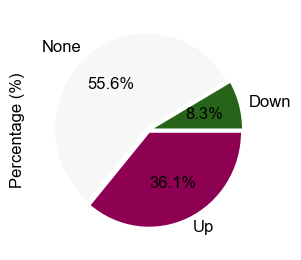

In [7]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout first half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = Start+((End-Start)/2)
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsDatafirst =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1first = getBoutMeans_(mice, boutsDatafirst, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1first, percFR1first] = getStats(boutMeansFR1first, choice='Ranksum', parameter='Auc', p_val=0.05)

plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1first.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')
    
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\updownallaround_eat_bout_first_half.svg")
statsFR1first.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\first_half_stats.csv")

In [ ]:
# Second half


3  mice were loaded.

Traces were not baselined.


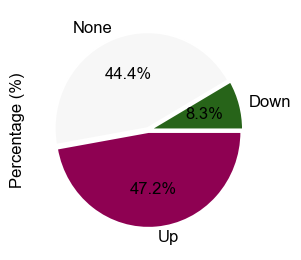

In [13]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout second half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = End-((End-Start)/2)
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsDatasecond =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1second = getBoutMeans_(mice, boutsDatasecond, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1second, percFR1second] = getStats(boutMeansFR1second, choice='Ranksum', parameter='Auc', p_val=0.05)

plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1second.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')
    
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\updownallaround_eat_bout_second_half.svg")
statsFR1second.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\second_half_stats.csv")

In [ ]:
# Whole bout


3  mice were loaded.

Traces were not baselined.


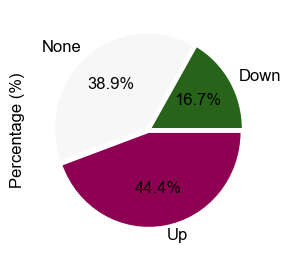

In [19]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsDatawhole =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
#boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1whole = getBoutMeans_(mice, boutsDatawhole, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1whole, percFR1whole] = getStats(boutMeansFR1whole, choice='Ranksum', parameter='Auc', p_val=0.05)

plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1whole.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')
    
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\updownallaround_eat_bout_whole.svg")
statsFR1whole.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\whole_bout_stats.csv")

In [14]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout first half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = Start+((End-Start)/2)
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', parameter='Auc', p_val=0.05)
statsFR1.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\first_half_stats_base.csv")


3  mice were loaded.

Baseline was set -8.27777777778 sec before the event.


In [15]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout second half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = End-((End-Start)/2)
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', parameter='Auc', p_val=0.05)
statsFR1.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\second_half_stats_base.csv")


3  mice were loaded.

Baseline was set -8.27777777778 sec before the event.


In [16]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
#boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', parameter='Auc', p_val=0.05)
statsFR1.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\whole_bout_stats_base.csv")


3  mice were loaded.

Baseline was set -8.27777777778 sec before the event.



3  mice were loaded.

Traces were not baselined.


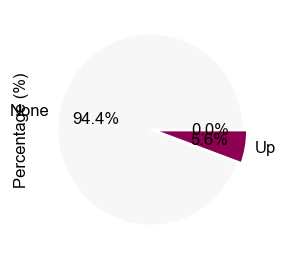

In [17]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Right poke
Start = getEvents(mice, eventList, 'Right_Poke', trials)
End = getEvents(mice, eventList, 'Success_Reward', trials)
eventStart = Start
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsDatafirst =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1first = getBoutMeans_(mice, boutsDatafirst, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1first, percFR1first] = getStats(boutMeansFR1first, choice='Ranksum', parameter='Auc', p_val=0.05)

plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1first.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')
    
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\updownallaround_right_poke.svg")
statsFR1first.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\right_poke_stats.csv")

In [18]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Right poke
Start = getEvents(mice, eventList, 'Right_Poke', trials)
End = getEvents(mice, eventList, 'Success_Reward', trials)
eventStart = Start
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
#boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', parameter='Auc', p_val=0.05)
statsFR1.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\right_poke_base.csv")


3  mice were loaded.

Baseline was set -3.0 sec before the event.


In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout first half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = Start+((End-Start)/2)
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

In [ ]:
[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)
percFR1

In [ ]:
statsFR1

In [ ]:
percFR1

In [ ]:
(boutMeansFR1['Bout_Auc'] - boutMeansFR1['Baseline_Auc']) / boutMeansFR1['Trace_Auc']

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
base = -5.0
duration = 30.0

eventStart = getEvents(mice, eventList, 'Eat_Start', trials)
eventEnd = getEvents(mice, eventList, 'Eat_End', trials)
baseEvent = getEvents(mice, eventList, 'Eat_Start', trials)

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Auc', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
base = -10.0
duration = 30.0

eventStart = getEvents(mice, eventList, 'Eat_Start', trials)
eventEnd = getEvents(mice, eventList, 'Eat_End', trials)
baseEvent = getEvents(mice, eventList, 'Eat_Start', trials)

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Auc', p_val=0.05)

percFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
base = -10.0
duration = 30.0

eventStart = getEvents(mice, eventList, 'Eat_Start', trials)
eventEnd = getEvents(mice, eventList, 'Eat_End', trials)
baseEvent = getEvents(mice, eventList, 'Eat_Start', trials)

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', parameter='Mean', p_val=0.05)

percFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
base = -10.0
duration = 30.0

eventStart = getEvents(mice, eventList, 'Eat_Start', trials)
eventEnd = getEvents(mice, eventList, 'Eat_End', trials)
baseEvent = getEvents(mice, eventList, 'Eat_Start', trials)

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', parameter='Auc', p_val=0.05)

percFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
base = -5.0
duration = 30.0

# Eating bout first half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = Start+(End-Start)/2
# Fixed baseline length
baseEvent = Start

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
base = -5.0
#duration = 30.0

# Eating bout last half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = End-(End-Start)/2
eventEnd = End
# Fixed baseline length
baseEvent = Start

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
base = -5.0
#duration = 30.0

# Eating bout first half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = End
# Fixed baseline length
baseEvent = Start

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
# First half

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout first half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = Start+((End-Start)/2)
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
statsFR1

In [ ]:
boutMeansFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout first half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = Start+((End-Start)/2)
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
# Second half

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout second half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = End-((End-Start)/2)
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout second half
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = End-((End-Start)/2)
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
# Whole bout

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
#boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
#base = -5.0
#duration = 30.0

# Eating bout
Start = getEvents(mice, eventList, 'Eat_Start', trials)
End = getEvents(mice, eventList, 'Eat_End', trials)
eventStart = Start
eventEnd = End
baseEvent = Start
# Baseline equal to the event duration
base = Start-End

boutsData =  getBouts_(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=True)
#boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans_(mice, boutsData, behType=behType, trials=trials, base=base, fs=fs)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Wilcoxon', parameter='Mean', p_val=0.05)

print percFR1['Up']/percFR1['Down']
percFR1

In [ ]:
stdList = pd.DataFrame()
for mus, sess in mice:
    std = pd.DataFrame({'Std' : dFFList[mus].std().values}, index=dFFList[mus].std().index)
    std['Mouse'] = mus
    stdList = stdList.append(std)

In [ ]:
# Table of event means
boutMeansFR1.pivot_table(index='Cell')
difference = pd.DataFrame({'Difference':boutMeansFR1.pivot_table(index='Cell')['Bout_Mean'].values - boutMeansFR1.pivot_table(index='Cell')['Baseline_Mean'].values}, 
              index=boutMeansFR1.pivot_table(index='Cell').index)

stdList['Difference'] = np.zeros(len(stdList)) 
#pd.concat(stdList, difference)
for cell in stdList.index:
    stdList['Difference'].loc[cell] = difference.loc[cell].values


In [ ]:
trace = boutsData.reset_index(drop=True).pivot_table(index=['Event'], columns=['Cell', 'New_Time'], values='Fluoro')[cell].T[1].dropna() 

upPoint = trace[trace > stdList['Std'].loc[cell]].index[0].round(2)
slopeChange = np.sign(trace.diff()) + np.sign(trace.diff()).shift()
eventRise = slopeChange[slopeChange == 0].index[slopeChange[slopeChange == 0].index < upPoint][-1]

np.round(eventRise, 2)